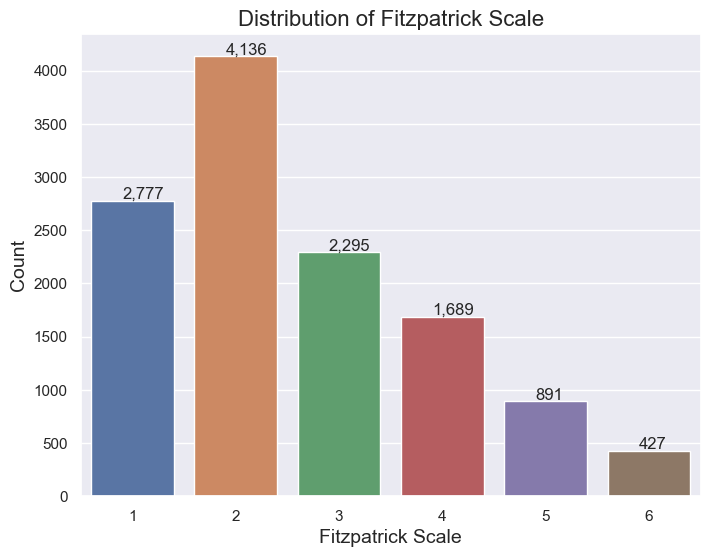

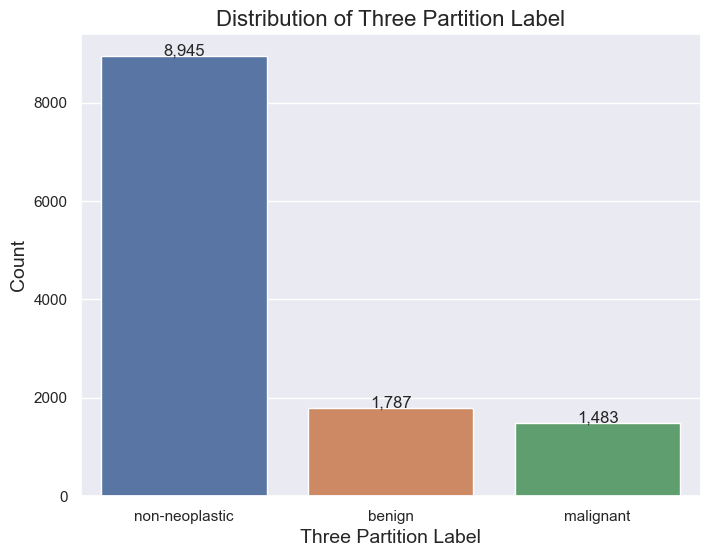

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_dataset.csv')


# Create countplot for Fitzpatrick scale
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="fitzpatrick_scale", data=df)
ax.set_title('Distribution of Fitzpatrick Scale', fontsize=16)
ax.set_xlabel('Fitzpatrick Scale', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()

# Create countplot for three_partition_label
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="three_partition_label", data=df)
ax.set_title('Distribution of Three Partition Label', fontsize=16)
ax.set_xlabel('Three Partition Label', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()

In [7]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the data
df = pd.read_csv('final_dataset.csv')

# Remove records with -1 Fitzpatrick scale value
df = df[df['fitzpatrick_scale'] != -1]

# Split the data by label
non_neoplastic = df[df['three_partition_label'] == 'non-neoplastic']
malignant = df[df['three_partition_label'] == 'malignant']
benign = df[df['three_partition_label'] == 'benign']

# Define the image data generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='reflect'
)

# Generate augmented images for each label and store them in a new dataframe
aug_df = pd.DataFrame(columns=['local_filename', 'three_partition_label', 'fitzpatrick_scale', 'label'])
for label, df_label in zip(['malignant', 'benign', 'non_neoplastic'], [malignant, benign, non_neoplastic]):
    num_augmented = len(non_neoplastic) - len(df_label)
    for i in range(num_augmented):
        img_path = df_label['local_filename'].iloc[i % len(df_label)]
        img_label = df_label['label'].iloc[i % len(df_label)]
        img_fitz_scale = df_label['fitzpatrick_scale'].iloc[i % len(df_label)]
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        for batch in datagen.flow(x, batch_size=1):
            row = pd.Series({'local_filename': '', 'three_partition_label': label, 'fitzpatrick_scale': img_fitz_scale, 'label': img_label})
            aug_img_path = f'{os.path.splitext(img_path)[0]}_aug_{i}.jpg'
            row['local_filename'] = aug_img_path
            plt.imsave(aug_img_path, batch[0].astype('uint8'))
            aug_df = aug_df.append(row, ignore_index=True)
            break

# Concatenate the original and augmented dataframes and balance the classes
df_aug = pd.concat([df, aug_df])
class_counts = df_aug['three_partition_label'].value_counts()
min_count = class_counts.min()
df_balanced = pd.concat([df_aug[df_aug['three_partition_label'] == label].sample(min_count, random_state=42) for label in class_counts.index])
df_balanced.reset_index(inplace=True, drop=True)

# Save the balanced dataframe as a CSV file
df_balanced.to_csv('balanced_dataset1.csv', index=False)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_7468\609691989.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_df = aug_df.append(row, ignore_index=True)


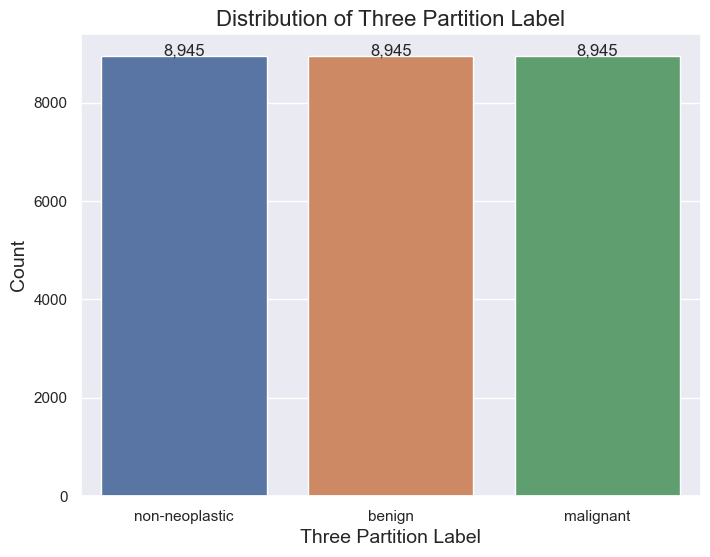

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('balanced_dataset1.csv')

# Visualize the distribution of labels using a countplot
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="three_partition_label", data=df)
ax.set_title('Distribution of Three Partition Label', fontsize=16)
ax.set_xlabel('Three Partition Label', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()


In [9]:
# Get some basic statistics on the dataset
print(df_balanced.describe())

# Get the count of unique values in each column
for column in df_balanced.columns:
    print(column)
    print(df_balanced[column].value_counts())
    print()


       fitzpatrick_centaur
count         12215.000000
mean              2.049202
std               1.524040
min              -1.000000
25%               1.000000
50%               2.000000
75%               3.000000
max               6.000000
md5hash
07e59cf4b5bec072d420fffb61251e7e    1
2a6ceb5fa45c79b92d410f3a15ee8f57    1
1bd165cc867997bc37feb55cb1f988c2    1
96249b3a08f9bbfc6c097b39d8a0fb92    1
580c979fd95841dec7b97c40dee8820e    1
                                   ..
17aaa793c130f66106a8fbe6a789ba31    1
03f0bf9afe8fb5db0e1e3ad4fdf9a7ad    1
e36a99a325e8500c75fb38b8a6e30b00    1
da6bb7b6f339fe3346bb912e7ce10810    1
3e53dd43521fc2ccaa2c6a95c8df3fa5    1
Name: md5hash, Length: 12215, dtype: int64

fitzpatrick_scale
2    9420
1    6470
3    5027
4    3393
5    1725
6     800
Name: fitzpatrick_scale, dtype: int64

fitzpatrick_centaur
 1.0    5158
 2.0    2566
 3.0    1770
 4.0    1088
 5.0     715
-1.0     572
 6.0     346
Name: fitzpatrick_centaur, dtype: int64

label
squamous cel

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('balanced_dataset1.csv')

# Remove the records with -1 Fitzpatrick scale value
df = df[df['fitzpatrick_scale'] != -1]

# Save the updated dataset
df.to_csv('finalbalanced_dataset.csv', index=False)


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('finalbalanced_dataset.csv')

# Check if there are any records with Fitzpatrick scale value -1
if (-1 in df['fitzpatrick_scale'].values):
    print("There are records with Fitzpatrick scale value -1.")
else:
    print("There are no records with Fitzpatrick scale value -1.")


There are no records with Fitzpatrick scale value -1.
